<a href="https://colab.research.google.com/github/atharv79/Social-Media-Post-Classification/blob/main/NLP_%26_ML_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Social Media Sentiment Analysis using NLP and Machine Learning**

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Loading Datacsv
train_df = pd.read_csv("/content/train_tweet.csv")


Training Data Set - has 3 columns ID, Label & Tweet. Tweet columns has tweets writen by users & Label columns contains binary values 1 & 0.

Where 1 represent tweet is racist/sexist and 0 represent tweet is not racist/sexist

In [ ]:
#Training Data Set
train_df.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
# Training Data Set Information
print("Training Data Set Info - Total Rows | Total Columns | Total Null Values")
print(train_df.info())

Training Data Set Info - Total Rows | Total Columns | Total Null Values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None


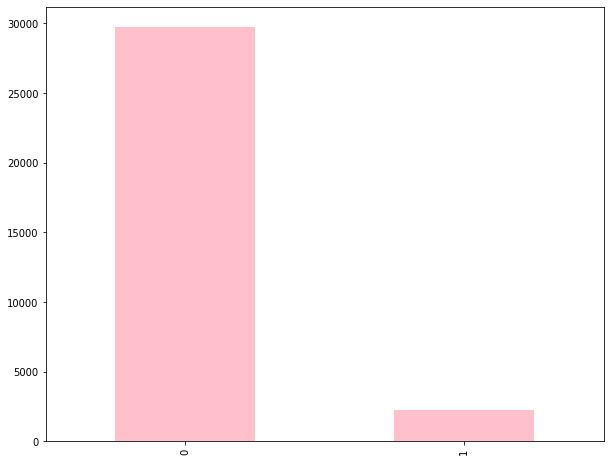

In [ ]:
train_df['label'].value_counts().plot.bar(color = 'pink', figsize = (10, 8))

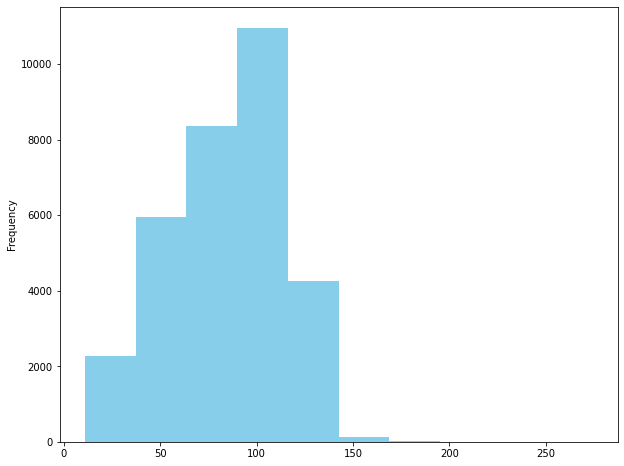

In [ ]:
length_train = train_df['tweet'].str.len().plot.hist(color = 'skyblue', figsize = (10, 8))

In [ ]:
train_df['len'] = train_df['tweet'].str.len()

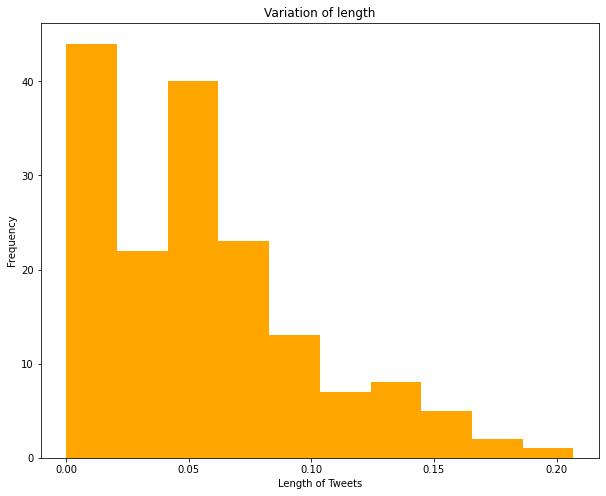

In [ ]:
train_df.groupby('len').mean()['label'].plot.hist(color = 'orange', figsize = (10, 8),)
plt.title('Variation of length')
plt.xlabel('Length of Tweets')
plt.show()

**Data processing & cleaning**

Step A : Converting html entities

In [ ]:
print("""Step A : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)""")

Step A : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)


In [ ]:
# Importing HTMLParser
from html.parser import HTMLParser
html_parser = HTMLParser()

In [ ]:
# Created a new columns i.e. clean_tweet contains the same tweets but cleaned version
train_df['clean_tweet'] = train_df['tweet'].apply(lambda x: html_parser.unescape(x))
train_df.head(10)

,id,label,tweet,len,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,102,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...,122,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty,21,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,86,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,39,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,116,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,74,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...,143,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,50,@user @user welcome here ! i'm it's so #gr...


Step B : Apostrophe Lookup

In [ ]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
apostrophe_dict

{"'cause": 'because',
 "ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [ ]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [ ]:
train_df['clean_tweet'] = train_df['clean_tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))
train_df.head(10)

,id,label,tweet,len,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,102,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...,122,@user @user thanks for #lyft credit i cannot u...
2,3,0,bihday your majesty,21,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,86,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,39,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,116,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,74,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...,143,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,50,@user @user welcome here ! I am it has / i...


Step C : Short Word Lookup

In [ ]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

Step D : Emotion Lookup

In [ ]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}
emoticon_dict

{'8-)': 'happy',
 ':(': 'sad',
 ':)': 'happy',
 ':-(': 'sad',
 ':-3': 'happy',
 ':-< ': 'sad',
 ':->': 'happy',
 ':-[': 'sad',
 ':-]': 'happy',
 ':-c': 'sad',
 ':-||': 'sad',
 ':-}': 'happy',
 ':<': 'sad',
 ':[': 'sad',
 ':^)': 'happy',
 ':c': 'sad',
 ':c)': 'happy',
 ':o)': 'happy',
 ':{': 'sad',
 ':‑)': 'happy',
 '<3': 'happy',
 '=)': 'happy',
 '=]': 'happy',
 '>:(': 'sad',
 '>:[': 'sad'}

In [ ]:
train_df['clean_tweet'] = train_df['clean_tweet'].apply(lambda x: lookup_dict(x,short_word_dict))
train_df.head(10)

,id,label,tweet,len,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,102,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...,122,@user @user thanks for #lyft credit i cannot u...
2,3,0,bihday your majesty,21,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,86,#model i love you take with you all the time...
4,5,0,factsguide: society now #motivation,39,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,116,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,74,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...,143,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,50,@user @user welcome here ! I am it has / i...


Step E: Replacing Numbers (integers) with space

In [ ]:
train_df['clean_tweet'] = train_df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
train_df.head(10)

,id,label,tweet,len,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,102,user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...,122,user user thanks for lyft credit i cannot u...
2,3,0,bihday your majesty,21,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,86,model i love you take with you all the time...
4,5,0,factsguide: society now #motivation,39,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,116,huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,74,user camping tomorrow user user user use...
7,8,0,the next school year is the year for exams.ð...,143,the next school year is the year for exams ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87,we won love the land allin cavs champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,50,user user welcome here I am it has i...


Step F: Removing words whom length is 1

In [ ]:
train_df['clean_tweet'] = train_df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
train_df['clean_tweet'][0:5]

0    user when father is dysfunctional and is so se...
1    user user thanks for lyft credit cannot use ca...
2                                  bihday your majesty
3    model love you take with you all the time in your
4                    factsguide society now motivation
Name: clean_tweet, dtype: object

Step G : Spelling Correction - With TextBlob Library

In [ ]:
from textblob import TextBlob
# Spelling correction is a cool feature which TextBlob offers, we can be accessed using the correct function as shown below.
blob = TextBlob("Why are you stting on this bech??") # Scentence with two errors
print(blob.correct()) # Correct function give us the best possible word simmilar to "gret"

Why are you sitting on this bench??


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Applying TextBlob on our data set - Spelling correction

In [ ]:
# Not cleaning the just showing the spelling check as its take lot of time to process all these tweets
## Shown sample how its must done
text = train_df['clean_tweet'][0:10].apply(lambda x: str(TextBlob(x).correct()))
text

0    user when father is dysfunctional and is so se...
1    user user thanks for left credit cannot use ca...
2                                  midday your majesty
3    model love you take with you all the time in your
4                    factsguide society now motivation
5    huge fan fare and big talking before they leav...
6    user camping tomorrow user user user user user...
7    the next school year is the year for exam cann...
8    we won love the land allen caps champions clev...
9         user user welcome here am it has it is so gr
Name: clean_tweet, dtype: object

**Natural Language Preprocessing(NLP)**

1.Removing punctuations like . , ! $( ) * % @

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [ ]:
# remove twitter handles (@user)
train_df['clean_tweet'] = np.vectorize(remove_pattern)(train_df['clean_tweet'], "@[\w]*")
train_df.head(10)

,id,label,tweet,len,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,102,user when father is dysfunctional and is so se...
1,2,0,@user @user thanks for #lyft credit i can't us...,122,user user thanks for lyft credit cannot use ca...
2,3,0,bihday your majesty,21,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,86,model love you take with you all the time in your
4,5,0,factsguide: society now #motivation,39,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,116,huge fan fare and big talking before they leav...
6,7,0,@user camping tomorrow @user @user @user @use...,74,user camping tomorrow user user user user user...
7,8,0,the next school year is the year for exams.ð...,143,the next school year is the year for exams can...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87,we won love the land allin cavs champions clev...
9,10,0,@user @user welcome here ! i'm it's so #gr...,50,user user welcome here am it has it is so gr


**2.Lower casing**

In [ ]:
train_df['clean_tweet'] = train_df['clean_tweet'].apply(lambda x: x.lower())
train_df.head(10)

,id,label,tweet,len,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,102,user when father is dysfunctional and is so se...
1,2,0,@user @user thanks for #lyft credit i can't us...,122,user user thanks for lyft credit cannot use ca...
2,3,0,bihday your majesty,21,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,86,model love you take with you all the time in your
4,5,0,factsguide: society now #motivation,39,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,116,huge fan fare and big talking before they leav...
6,7,0,@user camping tomorrow @user @user @user @use...,74,user camping tomorrow user user user user user...
7,8,0,the next school year is the year for exams.ð...,143,the next school year is the year for exams can...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87,we won love the land allin cavs champions clev...
9,10,0,@user @user welcome here ! i'm it's so #gr...,50,user user welcome here am it has it is so gr


**3.Tokenization**

In [ ]:
# Importing stop words from NLTK coupus and word tokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# Creating token for the clean tweets
train_df['tweet_token'] = train_df['clean_tweet'].apply(lambda x: word_tokenize(x))

## Fully formated tweets & there tokens
train_df.head(10)

,id,label,tweet,len,clean_tweet,tweet_token
0,1,0,@user when a father is dysfunctional and is s...,102,user when father is dysfunctional and is so se...,"[user, when, father, is, dysfunctional, and, i..."
1,2,0,@user @user thanks for #lyft credit i can't us...,122,user user thanks for lyft credit cannot use ca...,"[user, user, thanks, for, lyft, credit, can, n..."
2,3,0,bihday your majesty,21,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,86,model love you take with you all the time in your,"[model, love, you, take, with, you, all, the, ..."
4,5,0,factsguide: society now #motivation,39,factsguide society now motivation,"[factsguide, society, now, motivation]"
5,6,0,[2/2] huge fan fare and big talking before the...,116,huge fan fare and big talking before they leav...,"[huge, fan, fare, and, big, talking, before, t..."
6,7,0,@user camping tomorrow @user @user @user @use...,74,user camping tomorrow user user user user user...,"[user, camping, tomorrow, user, user, user, us..."
7,8,0,the next school year is the year for exams.ð...,143,the next school year is the year for exams can...,"[the, next, school, year, is, the, year, for, ..."
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87,we won love the land allin cavs champions clev...,"[we, won, love, the, land, allin, cavs, champi..."
9,10,0,@user @user welcome here ! i'm it's so #gr...,50,user user welcome here am it has it is so gr,"[user, user, welcome, here, am, it, has, it, i..."


**4.Removing Stopwords**

In [ ]:
# Importing stop words from NLTK corpus for english language
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
# Created new columns of tokens - where stop words are being removed
train_df['tweet_token_filtered'] = train_df['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])

## Tokens columns with stop words and without stop words
train_df[['tweet_token', 'tweet_token_filtered']].head(10)

,tweet_token,tweet_token_filtered
0,"[user, when, father, is, dysfunctional, and, i...","[user, father, dysfunctional, selfish, drags, ..."
1,"[user, user, thanks, for, lyft, credit, can, n...","[user, user, thanks, lyft, credit, use, cause,..."
2,"[bihday, your, majesty]","[bihday, majesty]"
3,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time]"
4,"[factsguide, society, now, motivation]","[factsguide, society, motivation]"
5,"[huge, fan, fare, and, big, talking, before, t...","[huge, fan, fare, big, talking, leave, chaos, ..."
6,"[user, camping, tomorrow, user, user, user, us...","[user, camping, tomorrow, user, user, user, us..."
7,"[the, next, school, year, is, the, year, for, ...","[next, school, year, year, exams, think, schoo..."
8,"[we, won, love, the, land, allin, cavs, champi...","[love, land, allin, cavs, champions, cleveland..."
9,"[user, user, welcome, here, am, it, has, it, i...","[user, user, welcome, gr]"


**5.Stemming**

In [ ]:
# Importing library for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [ ]:
# Created one more columns tweet_stemmed it shows tweets' stemmed version
train_df['tweet_stemmed'] = train_df['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
train_df['tweet_stemmed'].head(10)

0    user father dysfunct selfish drag kid dysfunct...
1    user user thank lyft credit use caus offer whe...
2                                       bihday majesti
3                                 model love take time
4                              factsguid societi motiv
5    huge fan fare big talk leav chao pay disput ge...
6    user camp tomorrow user user user user user us...
7    next school year year exam think school exam h...
8    love land allin cav champion cleveland clevela...
9                                  user user welcom gr
Name: tweet_stemmed, dtype: object

6.Lemmatization

In [ ]:
# Importing library for lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

In [ ]:
# Created one more columns tweet_lemmatized it shows tweets' lemmatized version
nltk.download('wordnet')
train_df['tweet_lemmatized'] = train_df['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
train_df['tweet_lemmatized'].head(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


0    user father dysfunctional selfish drag kid dys...
1    user user thanks lyft credit use cause offer w...
2                                       bihday majesty
3                                 model love take time
4                        factsguide society motivation
5    huge fan fare big talking leave chaos pay disp...
6    user camping tomorrow user user user user user...
7    next school year year exam think school exam h...
8    love land allin cavs champion cleveland clevel...
9                                 user user welcome gr
Name: tweet_lemmatized, dtype: object

In [ ]:
# Our final dataframe - Fully formatted, Processed, Noise less, Cleaned, ready to analyse
## for further analysis we consider 2 columns i.e. "tweet_stemmed" & "tweet_lematized"
### We are using 2 columns to see which of them give us better score.
train_df.head(10)

,id,label,tweet,len,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0,@user when a father is dysfunctional and is s...,102,user when father is dysfunctional and is so se...,"[user, when, father, is, dysfunctional, and, i...","[user, father, dysfunctional, selfish, drags, ...",user father dysfunct selfish drag kid dysfunct...,user father dysfunctional selfish drag kid dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,122,user user thanks for lyft credit cannot use ca...,"[user, user, thanks, for, lyft, credit, can, n...","[user, user, thanks, lyft, credit, use, cause,...",user user thank lyft credit use caus offer whe...,user user thanks lyft credit use cause offer w...
2,3,0,bihday your majesty,21,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]",bihday majesti,bihday majesty
3,4,0,#model i love u take with u all the time in ...,86,model love you take with you all the time in your,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time]",model love take time,model love take time
4,5,0,factsguide: society now #motivation,39,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]",factsguid societi motiv,factsguide society motivation
5,6,0,[2/2] huge fan fare and big talking before the...,116,huge fan fare and big talking before they leav...,"[huge, fan, fare, and, big, talking, before, t...","[huge, fan, fare, big, talking, leave, chaos, ...",huge fan fare big talk leav chao pay disput ge...,huge fan fare big talking leave chaos pay disp...
6,7,0,@user camping tomorrow @user @user @user @use...,74,user camping tomorrow user user user user user...,"[user, camping, tomorrow, user, user, user, us...","[user, camping, tomorrow, user, user, user, us...",user camp tomorrow user user user user user us...,user camping tomorrow user user user user user...
7,8,0,the next school year is the year for exams.ð...,143,the next school year is the year for exams can...,"[the, next, school, year, is, the, year, for, ...","[next, school, year, year, exams, think, schoo...",next school year year exam think school exam h...,next school year year exam think school exam h...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87,we won love the land allin cavs champions clev...,"[we, won, love, the, land, allin, cavs, champi...","[love, land, allin, cavs, champions, cleveland...",love land allin cav champion cleveland clevela...,love land allin cavs champion cleveland clevel...
9,10,0,@user @user welcome here ! i'm it's so #gr...,50,user user welcome here am it has it is so gr,"[user, user, welcome, here, am, it, has, it, i...","[user, user, welcome, gr]",user user welcom gr,user user welcome gr


**Now When Our Data Is Cleaned & Ready We Start Our Text Analysis**

We will do our analysis on two columns i.e. "tweet_stemmed" & "tweet_lematized"

 Most common words in non racist/sexist(Positive) tweets

In [ ]:
from wordcloud import WordCloud

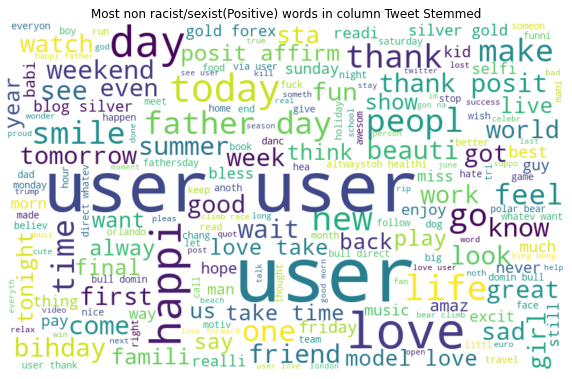

In [ ]:
#Visualizing all the normal or non racist/sexist words in column "tweet_stemmed" in our data using the wordcloud plot.
normal_words =' '.join([text for text in train_df['tweet_stemmed'][train_df['label'] == 0]])

wordcloud = WordCloud(background_color="white",width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist(Positive) words in column Tweet Stemmed")
plt.show()

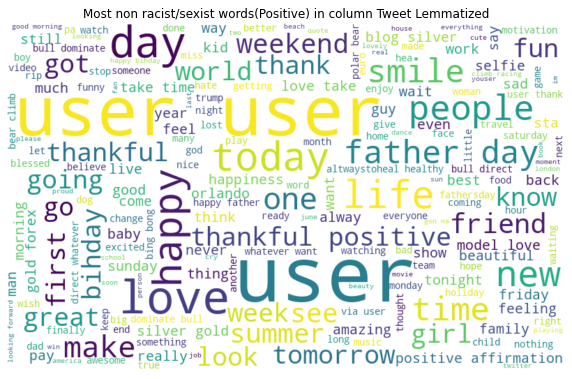

In [ ]:
#Visualizing all the normal or non racist/sexist words in column "tweet_lemmatized" in our data using the wordcloud plot.
normal_words =' '.join([text for text in train_df['tweet_lemmatized'][train_df['label'] == 0]])

wordcloud = WordCloud(background_color="white", width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words(Positive) in column Tweet Lemmatized")
plt.show()

**In above plots we can see most of the words are positive or neutral. With happy and love being the most frequent ones.**

**Most common words in racist/sexist(Negative) tweets**

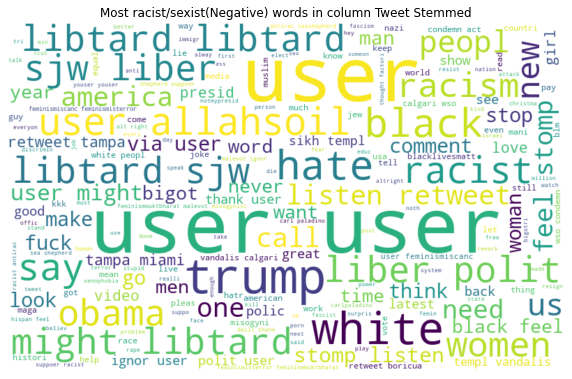

In [ ]:
#Visualizing all the negative or racist/sexist words in column "tweet_stemmed" in our data using the wordcloud plot.
negative_words =' '.join([text for text in train_df['tweet_stemmed'][train_df['label'] == 1]])

wordcloud = WordCloud(background_color="white", width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist(Negative) words in column Tweet Stemmed")
plt.show()

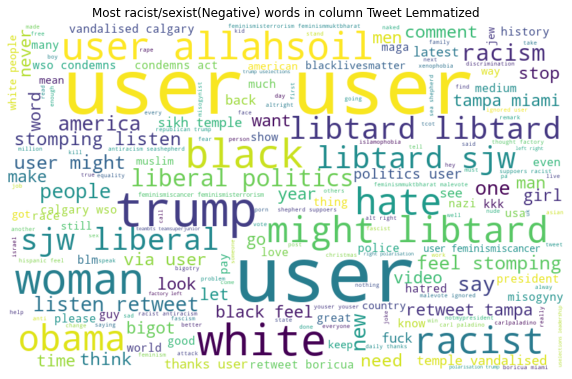

In [ ]:
#Visualizing all the negative or racist/sexist words in column "tweet_lemmatized" in our data using the wordcloud plot.
negative_words =' '.join([text for text in train_df['tweet_lemmatized'][train_df['label'] == 1]])

wordcloud = WordCloud(background_color="white", width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist(Negative) words in column Tweet Lemmatized")
plt.show()

**In above plots we can see most of the words are negative or racist/sexist. With racist, hate and black being the most frequent ones**

**Extracting Features from Cleaned Tweets**

**TF-IDF**

In [ ]:
# Importing library
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
print(tfidf_vectorizer)

TfidfVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')


**TF-IDF feature matrix - For columns "train_df
['tweet_stemmed']"**

In [ ]:

tfidf_stem = tfidf_vectorizer.fit_transform(train_df['tweet_stemmed'])
print(tfidf_stem)

  (0, 736)	0.6215071082189765
  (0, 456)	0.5842753470805032
  (0, 293)	0.47813195739942493
  (0, 923)	0.20914364570944374
  (1, 596)	0.5748402712099464
  (1, 134)	0.5225242310560954
  (1, 921)	0.4299372406833257
  (1, 871)	0.3320964164144228
  (1, 923)	0.3184227219166647
  (2, 81)	1.0
  (3, 880)	0.5568942014760362
  (3, 511)	0.4385034867704928
  (3, 554)	0.7053960167540558
  (4, 563)	1.0
  (5, 627)	0.36586076404695406
  (5, 479)	0.38850443663253226
  (5, 855)	0.40161078777729764
  (5, 79)	0.39072649199973314
  (5, 288)	0.40762212707567197
  (5, 420)	0.4848669808891954
  (6, 886)	0.27955681695513196
  (6, 126)	0.3843933693802067
  (6, 923)	0.8798236889686744
  (7, 343)	0.19687862669133827
  (7, 430)	0.2998970368018418
  :	:
  (31955, 406)	0.4842153245169039
  (31955, 838)	0.4055791004993799
  (31955, 957)	0.4017504747261547
  (31955, 923)	0.16656470911556598
  (31956, 940)	0.4902318439891068
  (31956, 988)	0.5081457568549825
  (31956, 886)	0.5270154325409028
  (31956, 880)	0.42512383469

**2.TF-IDF feature matrix - For columns "train_df['tweet_lemmatized']"**

In [ ]:

tfidf_lemm = tfidf_vectorizer.fit_transform(train_df['tweet_lemmatized'])
print(tfidf_lemm)

  (0, 724)	0.6487435895450656
  (0, 438)	0.568907798213999
  (0, 261)	0.463081972193228
  (0, 920)	0.20256050746656792
  (1, 587)	0.5465488368944065
  (1, 118)	0.4950454975223496
  (1, 916)	0.4662824317956719
  (1, 865)	0.39215118226770296
  (1, 920)	0.2915689769453843
  (2, 66)	1.0
  (3, 876)	0.552061772894451
  (3, 501)	0.4490704471608385
  (3, 546)	0.7025407692051758
  (4, 555)	1.0
  (5, 618)	0.35395155712136356
  (5, 464)	0.4006502560178553
  (5, 845)	0.4463778721872411
  (5, 64)	0.37649010407840633
  (5, 257)	0.3924449093907488
  (5, 404)	0.4681737470321225
  (6, 881)	0.302822881187817
  (6, 920)	0.9530468522738582
  (7, 322)	0.2059146294984647
  (7, 365)	0.2463008968945578
  (7, 868)	0.22094395180959897
  :	:
  (31955, 828)	0.35728500890993853
  (31955, 955)	0.3540343603035898
  (31955, 920)	0.1467311148606073
  (31956, 936)	0.5144995424940038
  (31956, 987)	0.49985615690085294
  (31956, 881)	0.5184180034637503
  (31956, 876)	0.4184289160255701
  (31956, 920)	0.20394621619460326


In [ ]:
train_corpus = []
for i in range(0, 31962):
  #review = re.sub('[^a-zA-Z]', ' ', train_df['tweet'][i])
  review = re.sub('[^a-zA-Z]', ' ', train_df['tweet'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()

  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

**2. Bag of Words**

In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train_df.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


**Splitting the training data into train and valid sets**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

**Machine Learning Models**

*1.Logistic Regression*

In [ ]:
#Fitting Logistic Regression classifier to the training set
from sklearn.linear_model import LogisticRegression
model_l= LogisticRegression()
model_l.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred_l= model_l.predict(x_test)
y_pred_l

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
acc_l=model_l.score(x,y)*100
acc_l

92.98542018647143

In [ ]:
from sklearn.metrics import confusion_matrix
cm_l= confusion_matrix(y_test, y_pred_l)
cm_l

array([[7216,  244],
       [ 211,  320]])

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_l))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7460
           1       0.57      0.60      0.58       531

    accuracy                           0.94      7991
   macro avg       0.77      0.78      0.78      7991
weighted avg       0.94      0.94      0.94      7991



*2. Decision Tree*

In [ ]:
#Fitting Decision Tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier
model_d= DecisionTreeClassifier(criterion='entropy', random_state=0)
model_d.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_d= model_d.predict(x_test)
y_pred_d

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm_d= confusion_matrix(y_test, y_pred_d)
cm_d

array([[7165,  295],
       [ 236,  295]])

In [ ]:
acc_d=model_d.score(x,y)*100
acc_d

92.98542018647143

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_d))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7460
           1       0.50      0.56      0.53       531

    accuracy                           0.93      7991
   macro avg       0.73      0.76      0.75      7991
weighted avg       0.94      0.93      0.94      7991



*3. K-Nearest Neighbour(KNN)*

In [ ]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
model_k= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
model_k.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
#Predicting the test set result
y_pred_k= model_k.predict(x_test)
y_pred_k

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm_k= confusion_matrix(y_test, y_pred_k)
cm_k

array([[7401,   59],
       [ 367,  164]])

In [ ]:
acc_k=model_k.score(x,y)*100
acc_k

92.976034040423

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_k))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7460
           1       0.74      0.31      0.44       531

    accuracy                           0.95      7991
   macro avg       0.84      0.65      0.70      7991
weighted avg       0.94      0.95      0.94      7991



*4.Naive Bayes*

In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_b = GaussianNB()
classifier_b.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred_b = classifier_b.predict(x_test)
y_pred_b

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_n = confusion_matrix(y_test, y_pred_b)
cm_n

array([[4908, 2552],
       [ 110,  421]])

In [ ]:
acc_b=classifier_b.score(x,y)*100
acc_b

93.70815343220073

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_b))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79      7460
           1       0.14      0.79      0.24       531

    accuracy                           0.67      7991
   macro avg       0.56      0.73      0.51      7991
weighted avg       0.92      0.67      0.75      7991



**Accuracy Comparison**

In [ ]:


print("Accuracy of Logistic Regression :",acc_l)

print("Accuracy of Decision Tree  :",acc_d)

print("Accuracy of K-Nearest Neighbour  :",acc_k)

print("Accuracy of  Naive Bayes\t:",acc_b)


Accuracy of Logistic Regression : 92.98542018647143
Accuracy of Decision Tree  : 92.98542018647143
Accuracy of K-Nearest Neighbour  : 92.976034040423
Accuracy of  Naive Bayes	: 93.70815343220073
